In this file we will perform exploratory data analysis, build preliminary models that we covered in class to confirm that you would be able to model the problem using data mining techniques:

https://www.kaggle.com/code/ahmedklabi/heart-disease-pred/data



# **Loading libaries and file**

In [1]:
# Import packages

import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from prettytable import PrettyTable
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
import sklearn.metrics as metrics

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Load data file

from google.colab import files
uploaded = files.upload()

import io
db = pd.read_csv(io.BytesIO(uploaded['heart.csv']))

Saving heart.csv to heart.csv


In [ ]:
# What was asked in the survey and what each variable mean?

t = PrettyTable(['Column Header', 'Detail/Survey question'])
t.add_row(['Heart Disease', 'Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)'])
t.add_row(['BMI', 'Body Mass Index (BMI)'])
t.add_row(['Smoking', 'Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]'])
t.add_row(['Alcohol Drinking', 'Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week'])
t.add_row(['Stroke', '(Ever told) (you had) a stroke?'])
t.add_row(['Physical Health', 'Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days)'])
t.add_row(['Mental Health', 'Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days)'])
t.add_row(['Difficulty Walking', 'Do you have serious difficulty walking or climbing stairs?'])
t.add_row(['Sex', 'Are you male or female?'])
t.add_row(['Age Category', 'Fourteen-level age category'])
t.align = "l"
print(t)

+--------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Column Header      | Detail/Survey question                                                                                                                                                        |
+--------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Heart Disease      | Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)                                                                         |
| BMI                | Body Mass Index (BMI)                                                                                                                                                         |
| Smo

# **Exploring the data**

In [ ]:
# EDA

db.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

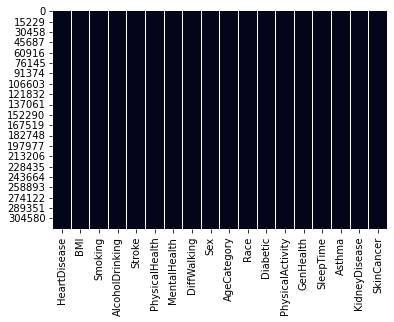

In [ ]:
sns.heatmap(db.isnull(), cbar=False)

In [ ]:
db.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [ ]:
# Examine data types

db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
db["AgeCategory"].value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

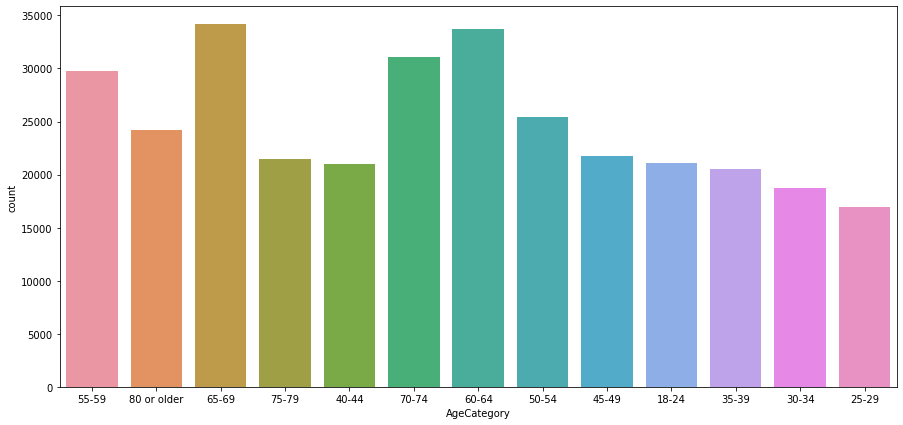

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data=db,x="AgeCategory")

In [4]:
# Recoding target variable

db['HeartDisease'] = db['HeartDisease'].apply(lambda x: 1 if x == 'Yes' else 0)

In [5]:
# Transforming variables into dummy

db_clean = db.drop(["AgeCategory","GenHealth","BMI","PhysicalHealth","MentalHealth","SleepTime","HeartDisease"],axis=1).columns
for i in db_clean:
  n = pd.get_dummies(db[i],drop_first=True)
  db.drop(i,axis=1,inplace=True)
  if(list(n.columns)[0]=="Yes"):
    n.rename(columns={"Yes":i} ,inplace=True) 
  db = pd.concat([db,n],axis=1)

In [6]:
# Fit label encoder and return encoded labels

le = LabelEncoder()
cols = ["AgeCategory","GenHealth","PhysicalHealth","MentalHealth","SleepTime","HeartDisease"]
for i in cols :
  db[i] = db[[i]].apply(le.fit_transform)

In [ ]:
db.head()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,GenHealth,SleepTime,Smoking,AlcoholDrinking,Stroke,...,Hispanic,Other,White,"No, borderline diabetes",Yes,Yes (during pregnancy),PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,0,16.60,3,30,7,4,4,1,0,0,...,0,0,1,0,1,0,1,1,0,1
1,0,20.34,0,0,12,4,6,0,0,1,...,0,0,1,0,0,0,1,0,0,0
2,0,26.58,20,30,9,1,7,1,0,0,...,0,0,1,0,1,0,1,1,0,0
3,0,24.21,0,0,11,2,5,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,23.71,28,0,4,4,7,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [ ]:
db.columns

Index(['HeartDisease', 'BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory',
       'GenHealth', 'SleepTime', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'DiffWalking', 'Male', 'Asian', 'Black', 'Hispanic', 'Other', 'White',
       'No, borderline diabetes', 'Yes', 'Yes (during pregnancy)',
       'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [7]:
db.columns = [c.replace('Yes', 'Diabetes_Yes') for c in db.columns]
db.columns = [c.replace('Other', 'Race_Other') for c in db.columns]

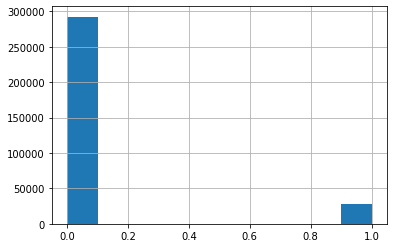

In [ ]:
# Evaluate target variable distribution

db.HeartDisease.hist()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f86a7da3750>,
      dtype=object)

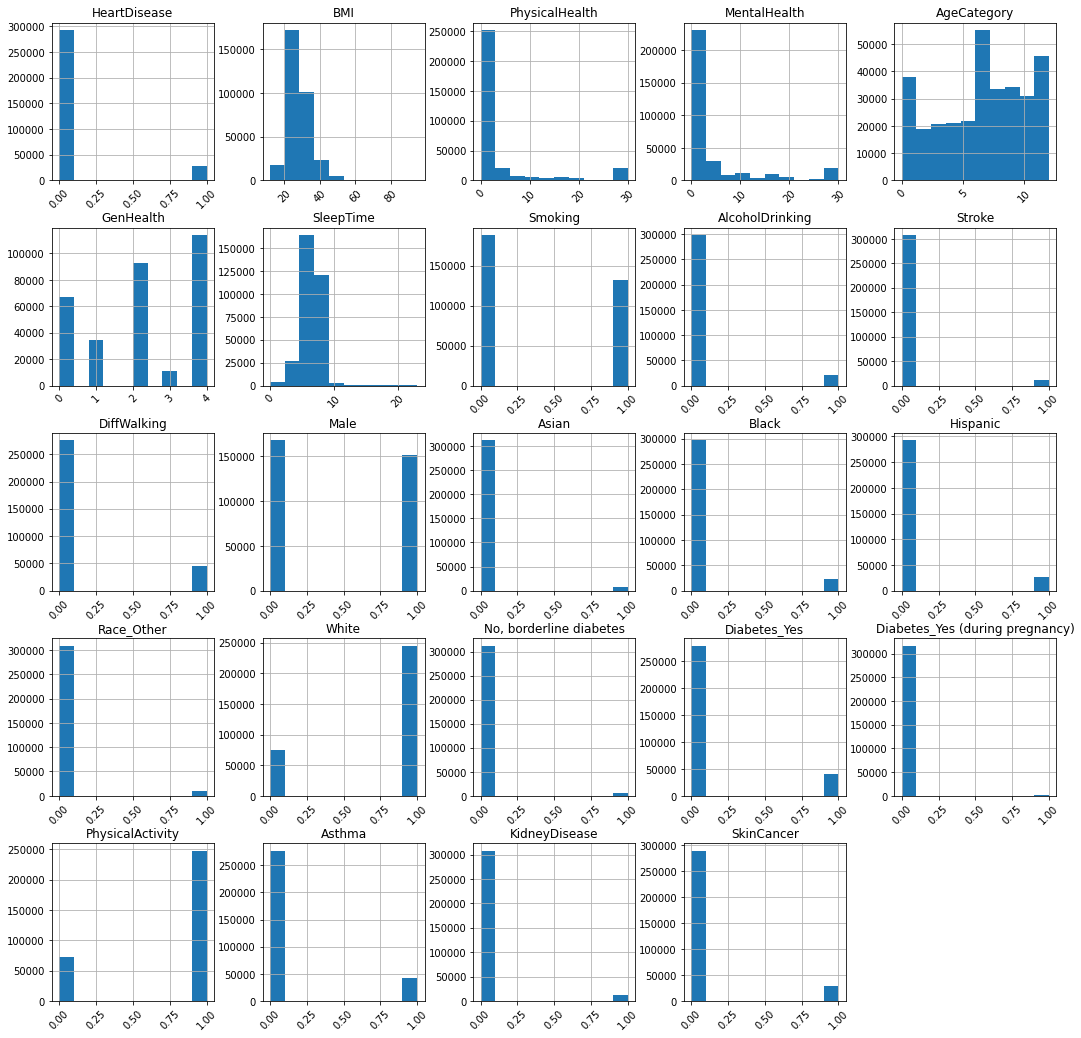

In [ ]:
# Explore data distribution of variables

db.hist(xrot=45.0,figsize=(18,18))

In [ ]:
db.corr()['HeartDisease'].sort_values(ascending=False)

HeartDisease                       1.000000
AgeCategory                        0.233432
DiffWalking                        0.201258
Stroke                             0.196835
Diabetes_Yes                       0.183072
PhysicalHealth                     0.170721
KidneyDisease                      0.145197
Smoking                            0.107764
SkinCancer                         0.093317
Male                               0.070040
BMI                                0.051803
Asthma                             0.041444
White                              0.040121
MentalHealth                       0.028591
No, borderline diabetes            0.016182
SleepTime                          0.008327
Race_Other                        -0.003039
Black                             -0.010156
GenHealth                         -0.011062
Diabetes_Yes (during pregnancy)   -0.013930
Asian                             -0.030262
AlcoholDrinking                   -0.032080
Hispanic                        

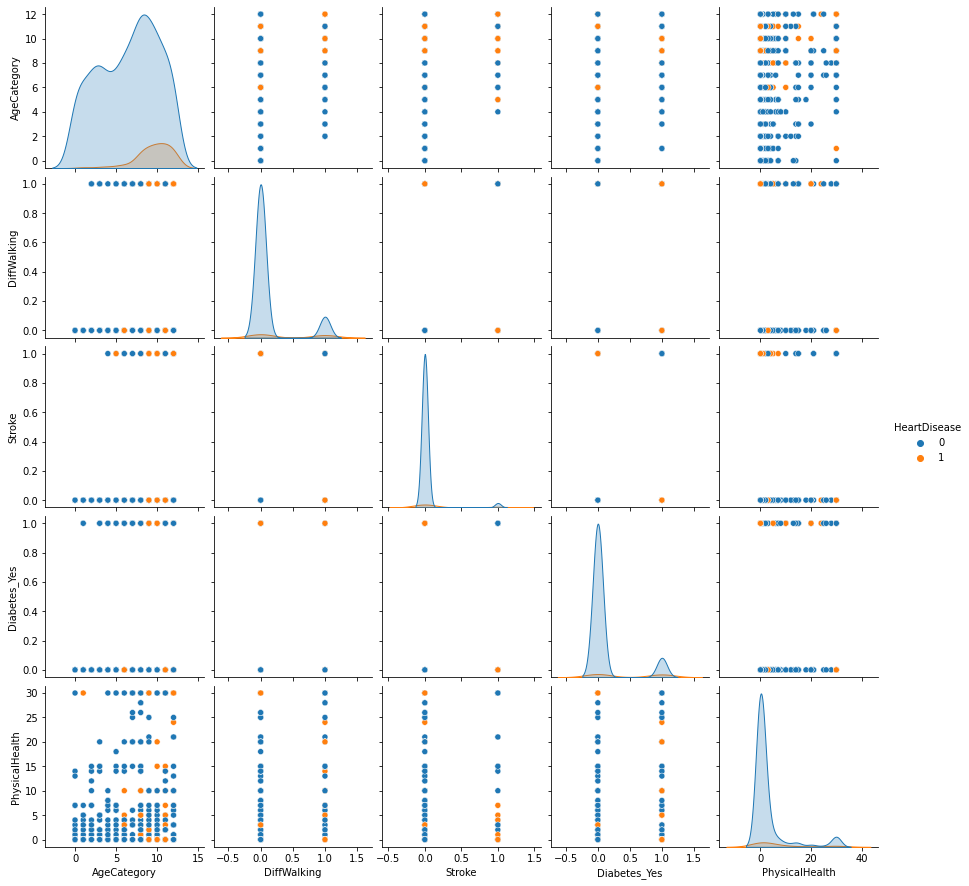

In [ ]:
# Examine data intercorrelations

sns.pairplot(db[['AgeCategory','DiffWalking','Stroke','Diabetes_Yes','PhysicalHealth','HeartDisease']].sample(1000), hue= 'HeartDisease')

# **Transforming the data**

In [8]:
# Separate set target and predictors

X = db.drop('HeartDisease', axis=1)
y = db['HeartDisease']

In [9]:
# Split data 70/30 into training and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [10]:
# Rescale the variables for analysis

scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_, columns=X.columns)

X_scaled.describe().transpose()



,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,0.196854,0.076737,0.0,0.144996,0.184957,0.234215,1.0
PhysicalHealth,319795.0,0.112390,0.265028,0.0,0.000000,0.000000,0.066667,1.0
MentalHealth,319795.0,0.129946,0.265175,0.0,0.000000,0.000000,0.100000,1.0
AgeCategory,319795.0,0.542878,0.297063,0.0,0.333333,0.583333,0.750000,1.0
GenHealth,319795.0,0.555226,0.383662,0.0,0.250000,0.500000,1.000000,1.0
SleepTime,319795.0,0.265090,0.062435,0.0,0.217391,0.260870,0.304348,1.0
Smoking,319795.0,0.412477,0.492281,0.0,0.000000,0.000000,1.000000,1.0
AlcoholDrinking,319795.0,0.068097,0.251912,0.0,0.000000,0.000000,0.000000,1.0
Stroke,319795.0,0.037740,0.190567,0.0,0.000000,0.000000,0.000000,1.0
DiffWalking,319795.0,0.138870,0.345812,0.0,0.000000,0.000000,0.000000,1.0


# **Writing and comparing the models**

In [11]:
# Logistic regression model to predict Heart Disease

logmodel = LogisticRegression(solver='liblinear')

logmodel.fit(X_train,y_train)

y_pred_log = logmodel.predict_proba(X_test)[:,1]

print('ROC AUC: ', roc_auc_score(y_test, y_pred_log)) 

ROC AUC:  0.8294372766902333


In [12]:
# kNN model to predict Heart Disease using k = 565 | k = n^(1/2)

knn = KNeighborsClassifier(n_neighbors=565, metric='euclidean')
knn.fit(X_train, y_train)

y_pred_knn = knn.predict_proba(X_test)[:,1]

print('ROC AUC: ', roc_auc_score(y_test, y_pred_knn))

ROC AUC:  0.8085639678301055


In [13]:
# Random Forest model to predict Heart Disease

rf_model  = RandomForestClassifier(max_depth=5, random_state=0)
rf_model.fit(X_train,y_train)

y_pred_rf = rf_model.predict_proba(X_test)[:,1]

print('ROC AUC: ', roc_auc_score(y_test, y_pred_rf))

ROC AUC:  0.8250724713185407


In [14]:
# Boosted tree model to predict Heart Disease

bt_model = AdaBoostClassifier(n_estimators=100)

bt_model.fit(X_train,y_train)

y_pred_bt = bt_model.predict_proba(X_test)[:,1]

print('ROC AUC: ', roc_auc_score(y_test, y_pred_bt))

ROC AUC:  0.8420246345805593


In [15]:
# Naive Bayes model to predict Heart Disease

nb_model = MultinomialNB(alpha=0.01)

nb_model.fit(X_train,y_train)

y_pred_nb = nb_model.predict_proba(X_test)[:,1]

print('ROC AUC: ', roc_auc_score(y_test, y_pred_nb))

ROC AUC:  0.7378077085265489


In [16]:
# ANN model (MLPClassifier) to predict Heart Disease

MLPC_model = MLPClassifier(hidden_layer_sizes=35, activation='logistic', solver='adam', random_state=1)

MLPC_model.fit(X_train, y_train)

y_pred_mlpc = MLPC_model.predict_proba(X_test)[:,1]

print('ROC AUC: ', roc_auc_score(y_test,y_pred_mlpc))

ROC AUC:  0.8424144200078614


# **Summary of results**

In [17]:
# Assessing the performance of each model using ROC AUC. 

t = PrettyTable(['Model','ROC AUC'])
t.add_row(['Logistic', (roc_auc_score(y_test, y_pred_log))])
t.add_row(['kNN', (roc_auc_score(y_test, y_pred_knn))])
t.add_row(['Random Forest', (roc_auc_score(y_test, y_pred_rf))])
t.add_row(['Boosted Tree', (roc_auc_score(y_test, y_pred_bt))])
t.add_row(['Naive', (roc_auc_score(y_test, y_pred_nb))])
t.add_row(['ANN', (roc_auc_score(y_test, y_pred_mlpc))])
t.align = "l"
print(t)

+---------------+--------------------+
| Model         | ROC AUC            |
+---------------+--------------------+
| Logistic      | 0.8294372766902333 |
| kNN           | 0.8085639678301055 |
| Random Forest | 0.8250724713185407 |
| Boosted Tree  | 0.8420246345805593 |
| Naive         | 0.7378077085265489 |
| ANN           | 0.8424144200078614 |
+---------------+--------------------+


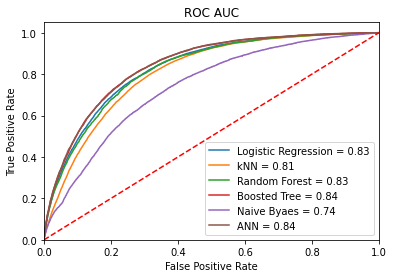

In [20]:
logit_roc_auc = roc_auc_score(y_test, y_pred_log)
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
bt_roc_auc = roc_auc_score(y_test, y_pred_bt)
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
mlpc_roc_auc = roc_auc_score(y_test, y_pred_mlpc)
log_fpr, log_tpr, thresholds = roc_curve(y_test, y_pred_log)
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, y_pred_knn)
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, y_pred_rf)
bt_fpr, bt_tpr, thresholds = roc_curve(y_test, y_pred_bt)
nb_fpr, nb_tpr, thresholds = roc_curve(y_test, y_pred_nb)
mlpc_fpr, mlpc_tpr, thresholds = roc_curve(y_test, y_pred_mlpc)
plt.figure()
plt.plot(log_fpr, log_tpr, label='Logistic Regression = %0.2f' % logit_roc_auc)
plt.plot(knn_fpr, knn_tpr, label='kNN = %0.2f' % knn_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest = %0.2f' % rf_roc_auc)
plt.plot(bt_fpr, bt_tpr, label='Boosted Tree = %0.2f' % bt_roc_auc)
plt.plot(nb_fpr, nb_tpr, label='Naive Byaes = %0.2f' % nb_roc_auc)
plt.plot(mlpc_fpr, mlpc_tpr, label='ANN = %0.2f' % mlpc_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC')
plt.legend(loc='lower right')
plt.savefig('log_ROC')
plt.show()